In [1]:
from dataset.mnist import load_mnist
(train_img,train_lab),(test_img,test_lab)= load_mnist(normalize=False,flatten=True)
print(train_img.shape)
print(train_lab.shape)
print(test_img.shape)
print(test_lab.shape)



Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
from PIL import Image
import numpy as np

def img_show(img):
    pil_img=Image.fromarray(img)
    pil_img.show()


train_img0=train_img[0]
train_lab0=train_lab[0]
print(train_lab0)
print(train_img0.shape)
real_img0= np.reshape(train_img0,(28,28))
img_show(real_img0)

test_img0=test_img[0]
test_lab0=test_lab[0]
print(test_lab0)
real_img0= np.reshape(test_img0,(28,28))
img_show(real_img0)

5
(784,)


7


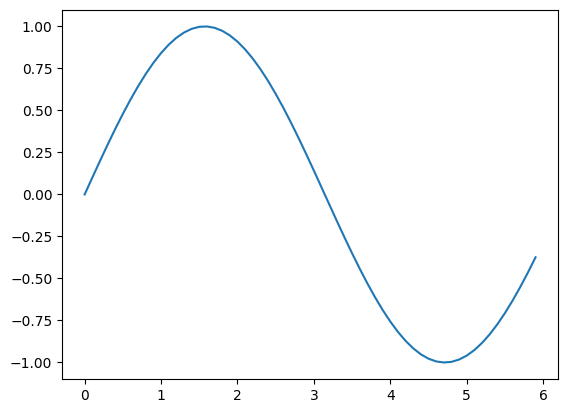

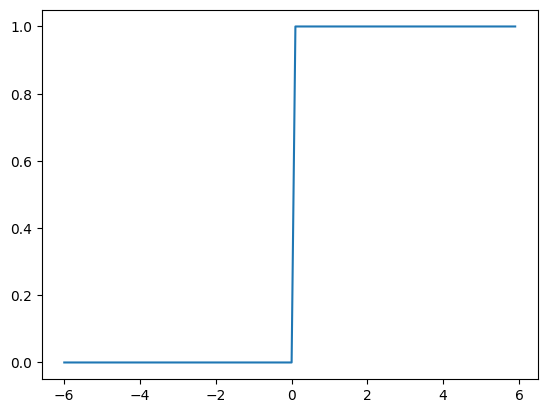

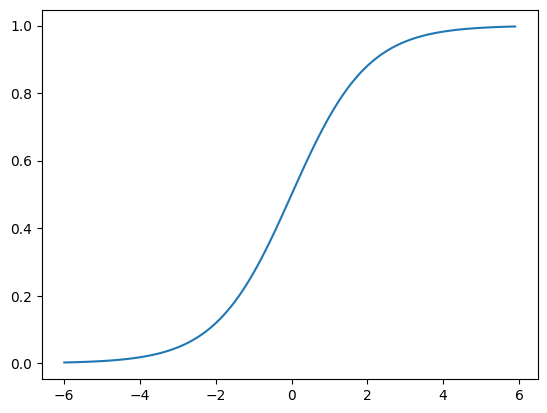

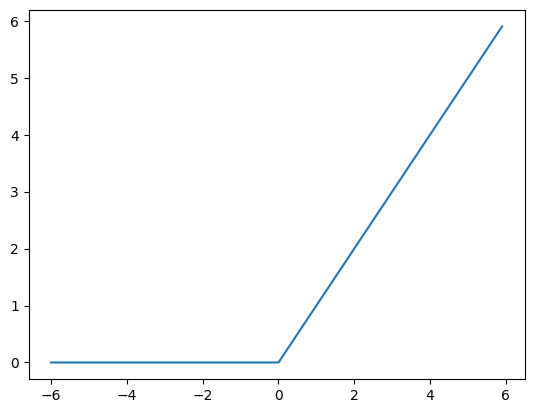

[0.31476718 0.6921593 ]


UnsupportedOperation: read

In [3]:
# 基于三层网络的推理处理
import pickle 
import deaplearn as dl
def init_network():
    with open("mnist_weight.pkl","wb")as f:
        network=pickle.load(f)
    return network
def get_data():
   (train_img,train_lab),(test_img,test_lab)= load_mnist(normalize=True,flatten=True,one_hot_label=False)
   return test_img,test_lab

def predict(network,x):
    W1,W2,W3= network["W1"],network["W1"],network["W1"]
    b1,b2,b3= network["b1"],network["b2"],network["b3"]
    a1=np.dot(x,W1)+b1
    x1=dl.sigmoid(a1)
    a2= np.dot(x1,W2)+b2
    x2= dl.sigmoid(a2)
    a3= np.dot(x2,W3)+b3
    return  dl.softmax(a3)


network=init_network()
datas,labs=get_data()
accuracy=0
for i  in range(len(datas)):
    res= predict(network,datas[i])
    max_res= np.argmax(res)
    if max_res==labs[i]:
        accuracy+=1
    

print("Accuracy:"+str(float(accuracy)/len(datas)))



# 批处理
group_size=100
accuracy=0
for i in range(0,len(datas),group_size):
    xs= datas[i:i+group_size]
    res= predict(network,xs)
    max_res= np.argmax(res,axis=1)
    accuracy+= np.sum( max_res==labs[i,i+group_size])
    
print("Accuracy:"+str(float(accuracy)/len(datas)))
    

    